In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]#word indices

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index=reuters.get_word_index()
reverse_word_index=dict((value,key) for (key,value) in word_index.items())
decoded_newswire=' '.join(reverse_word_index.get(i-3,'?') for i in train_data[0])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels #a topic index between 0 and 45

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [8]:
max([max(sequence) for sequence in train_data]) ###max(sequence) 每一个news里index最大的

9999

In [9]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [10]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [11]:
#categorical encoding
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

In [12]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)
#built in way

In [14]:
from keras import models
from keras import layers
import tensorflow as tf 
from keras.layers import Activation

In [19]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
print(model.output_shape)
model.add(layers.Dense(64,activation='relu'))
#model.add(Activation(tf.nn.softmax(dim=46)))
model.add(layers.Dense(46,activation='softmax'))
# for each input sample, the network will output a 46 dimensional vector
# softmax network will output a probability distribution over 46 different clsses
# the 46 scores will sum to 1
model.summary()

(None, 64)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
# loss function measures the distance between two probability distributions

In [21]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]
print(x_train.shape)
print(x_val.shape)
print(partial_x_train.shape)

(8982, 10000)
(1000, 10000)
(7982, 10000)


In [22]:
history=model.fit(partial_x_train, partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 651us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030
Epoch 

In [23]:
import matplotlib.pyplot as plt

In [24]:
for layer in model.layers:
    print(layer.output_shape)


(None, 64)
(None, 64)
(None, 46)


In [25]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

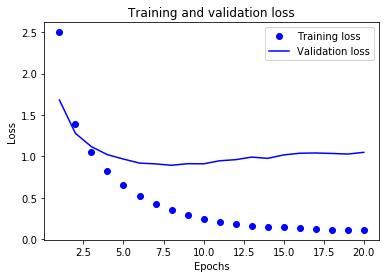

In [26]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

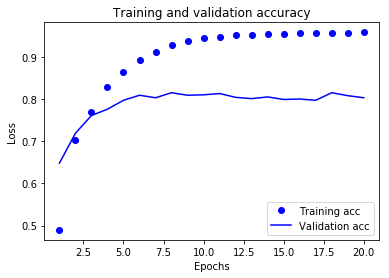

In [27]:
plt.clf()
acc=history.history['acc']
val_acc=history.history['val_acc']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()#9 epoch 开始overfitting

In [28]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
model.fit(partial_x_train,partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 112us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 89us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 89us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 92us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 90us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 90us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 91us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
798

In [31]:
results=model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 136us/step


In [32]:
results

[1.0224982637013056, 0.7756010686194165]

In [79]:
import copy

In [34]:
predictions=model.predict(x_test)
predictions

array([[1.0735568e-05, 8.4010127e-05, 2.6918939e-05, ..., 3.4000150e-05,
        6.6728821e-06, 9.8139371e-06],
       [7.0082757e-04, 1.5122072e-02, 3.0512512e-03, ..., 5.8086717e-04,
        1.2225285e-05, 2.6490091e-04],
       [1.7411116e-03, 7.6584816e-01, 2.7539390e-03, ..., 1.5349503e-04,
        2.0340015e-03, 2.3025507e-04],
       ...,
       [1.1296029e-05, 2.1594159e-04, 4.1379408e-05, ..., 8.9180076e-06,
        1.1616858e-04, 1.1518494e-05],
       [1.3093263e-03, 1.1848045e-01, 3.3700182e-03, ..., 6.0061575e-04,
        7.2683347e-04, 3.7474011e-04],
       [8.7234419e-04, 5.4426527e-01, 1.8597544e-03, ..., 5.4028569e-05,
        5.0407951e-04, 2.0568815e-04]], dtype=float32)

In [80]:
test_labels_copy=copy.copy(test_labels)

In [81]:
np.random.shuffle(test_labels_copy)

In [82]:
hits_array=np.array(test_labels)==np.array(test_labels_copy)

In [83]:
float(np.sum(hits_array))/len(test_labels)##compare to random baseline

0.19590382902938558

In [84]:
predictions=model.predict(x_test)

In [85]:
predictions[0].shape #each entry in predictions is a vector of length 46

(46,)

In [86]:
np.sum(predictions[0]) #coefficients in this vector sum to 1

1.0000001

In [87]:
np.argmax(predictions[0]) #返回的是x所在的最大值的下标的值

3

In [88]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)#cast them as interger tensor

In [89]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']) #loss function for interger labels

In [90]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) #units less than 46


In [93]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [94]:
model.fit(partial_x_train,partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 165us/step - loss: 2.6298 - acc: 0.4513 - val_loss: 1.8600 - val_acc: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 109us/step - loss: 1.5345 - acc: 0.6852 - val_loss: 1.4294 - val_acc: 0.6850
Epoch 3/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.2166 - acc: 0.7256 - val_loss: 1.3142 - val_acc: 0.6970
Epoch 4/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.0601 - acc: 0.7420 - val_loss: 1.2555 - val_acc: 0.7040
Epoch 5/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.9544 - acc: 0.7580 - val_loss: 1.2545 - val_acc: 0.7080
Epoch 6/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.8717 - acc: 0.7755 - val_loss: 1.2433 - val_acc: 0.7130
Epoch 7/20
7982/7982 [==============================] - 1s 114us/step - loss: 0.8035 - acc: 0.7954 - val_loss: 1.2485 - val_acc: 0.7190


In [95]:
results=model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 131us/step


In [96]:
results #compress too many information into  an i

[1.9809535505085891, 0.6936776491805898]